### Gradient Boosting Machines ( GBM )

* Artık optimizasyonuna dyayalı çalışan bir ağaç yöntemidir. Ağaç yöntemlerine boosting yöntemi ve gradient descentin uygulanmasıdır.  

* GBM'in temelleri AdaBoost'a dayanır. Bu yöntemin bazı kısıtlarını teorik olarak ortadan kaldırıp buraya bir de gradient descent yöntemini ekleyerek daha genel bir formu ortaya çıkmıştır. 

###### AdaBoost (Adaptive Boosting) Nedir?
* Zayıf sınıflandırıcıların bir araya gelerek güçlü sınıflandırıcı oluşturması fikrine dayanır. Schapires ve Freund'un 1996 ve 1199 yılları arasındaki çalışmalarıyla 1990'larda sorulan şu soruya yanıt bulunmuştur. Zayıf öğreniciler bir araya gelerek güçlü bir öğrenici ortaya çıkarabilir mi? AdaBoost yöntemi tıpkı bagging yöntemi gibi bir mihenk taşıdır, önemli bir dönüm noktasıdır. Şu anda piyasada en fazla başarıya ulaşan yöntemler de boosting yöntemleridir. 

* 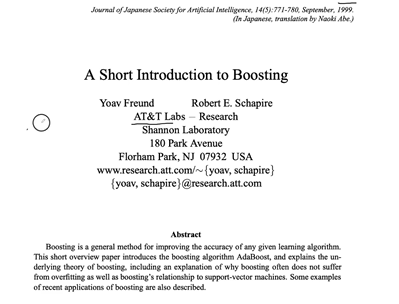

* 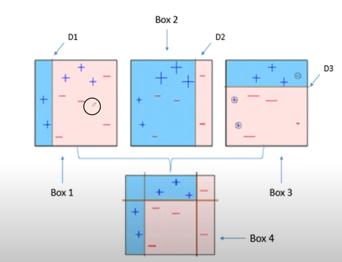

* Amacımız pozitif ve negatif sınıfları sınıflandırmaktır. Buradaki negatifleri bir sınıfı, artılar başka bir sınıfı ifade ediyor. Diyelim ki bir sınıflandırma yapıldı. İlk kutudaki mavininn içinde olan pozitifler (maviler) doğru sınıflandırılmış gözlem birimleri, kırmızının içinde olan negatifler de (kırmızılar) doğru sınıflandırılmış gözlem birimleridiir. Fakat burada yanlış sınıflandırılan bazı değerler vardır. 2.kutuya baktığımızda bu yanlış sınıflandırılanlara bir ağırlık verilerek tekrar bir sınıflandırma yapıldığında kırmızı bölgede olan kırmızılar doğru, mavi bölgede olan maviler doğru fakat yine yanlış sınıflandırılanlar var. Diğer kutuya baktığımızda yanlış sınıflandırılan noktalara yine ağırlık verildiğinde yine yanlış ve doğru sınıflandırmalarımız var ama yanlış sınıflandırma sayımız diğer 2 kutuya göre daha az. Son kutuya baktığımızda 3 tane sınıflandırıcı ağırlıklı olarak bir araya getirilmiş gibi duruyor. Topluluk öğrenme yaklaşımı var ama farklı olarak yanlış sınıflandırılan gözlemlerin doğru sınıflandırılmaya çalışılması çabasıyla ayrım noktaları hassaslaştırılmış. Son senaryoda diğer 3 tanesi bir araya getirilerek bu çizgiler belirli bir ağırlıkta gibi düşünülebilir bu üçünün etkisinde bir bölüm noktaları  oluşturulmuştur. 

###### Gradient Boosting Machines / Gradient Boosted Tree Nedir?

* 2001 yılında Friedman devreye girmiştir. Hatalar / artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur. 

* Friedman'a göre boosting yöntemleri bir optimizasyon problemleri olarak görülebilirdir. Dolayısıyla bunu bir optimizasyon problemi olarak ele almıştır. Boosting yöntemi uygun bir COST fonksiyonu üzerinde çalıştırılabilen bir optimizasyon algoritması olarak konumlanmıştır. Eğer türevlenebilir bir COST fonksiyonumuz varsa o zaman bunu gradient descent yöntemini kullanarak optimize edebiliriz. İteratif olarak hataları azaltacak şekilde ağaç optimizasyonu yapabiliriz. Gradient descent'in boosting yönteme uyarlandığı haldir. Ağaçların birbirine olan bağımlılıkları aşağıdaki şekilde gösterilmeye çalışılmıştır:

* 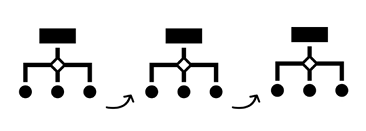

* Ağaçların birbirine bağımlı olması şu ifadeye gelir: Hatalar / artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur. Bu oldukça özenle seçilmiş bir cümledir. Bundan sonra görecek olduğumuz hemen hemen bütün ağaç yöntemleri GBM'e dayalıdır. Yani birazdan öğrenecek olduğumuz teorik framework diğer bütün yöntemlerin de temelini oluşturmaktadır. Dolayısıyla GBM'i çok iyi anlamak gerekmektedir. Daha sonra görecek olduğumuz LightGBM, XGBoost ve CatBoost'ta çok detay ele almayacağız. Bu nedenle şu an burayı çok detaylı olarak işleyeceğiz.

* Boosting + Gradient Descent = GBM

* 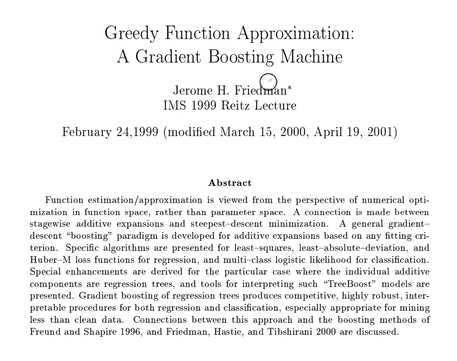

* 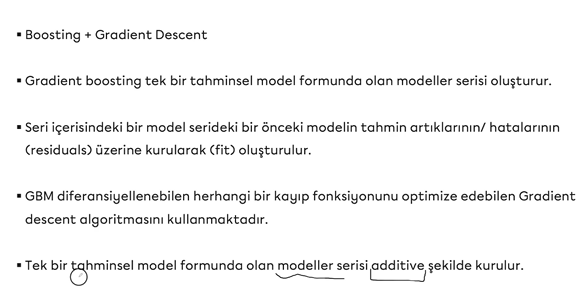


### GBM

* Aşağıdaki grafikte sabit bir fonksiyon olan y = 30 vardır. x'e bağlı olmayan bir fonksiyondur. Bunu x'e bağlı hale getirmek için y = 30 + x diyebiliriz.

* 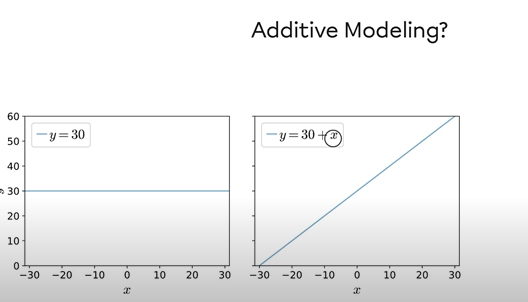

* Sabit olan fonksiyona x'i ekleyerek biçimlendirme işlemi yaptık. Bu fonksiyonu biraz daha detaylandırmak istersek ne yapmalıyız? Mesela kareli x ifadesi sinx, cosx gibi ifadeler ekleyebiliriz. Yani bir şekilde x'e bağlı terim ekleyebiliriz özetle. Eklediğimizde gözlemleneceği üzere fonksiyon daha da hassaslaşmıştır.

* 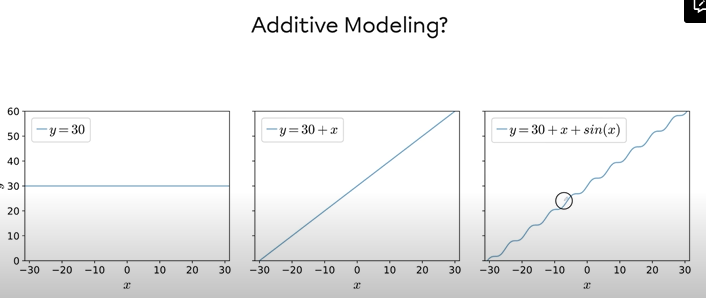

* Bu konunun temeli additive modellerdir. Nadir bazı kaynaklarda vardır. GBM'İn anlaşılması için daha önemli bir nokatdır. Tam konumuzla ilgisine gelecek olursak biz daha öncesinde bir ağaç yönteminkutuyu çeşitli bölgelere ayırma yöntemiyle çalıştığını görmüştük. Bu bölgelere ayırma işini biz daha hassas yapsak bu durumda bunu bir fonksiyon problemi olarak tanımlarsak daha öncesinde bu kutunun içinde kalan tüm y bağımlı değişken değerlerinin ortalamasını aldığımızda aslında buranın tahmin sonucunu veriyordu. O ortalama y = 30 daki sabit değer olan 30'dur. Sabit olan bu ortalama değerini eğer biz bir şekilde eklemeli olarak tahmin sonuçlarına dokunabilirsek buradaki 30'a additive bir model ile bunu yapabilirsek ki eklenen x'li ifadeler artıklar olacak, dolayısıyla tahmin sonucu olarak verdiğimiz bu 30'u ona bir şeyler ekleyip çıkararak biçimlendirebilirsek eğer daha başarılı tahminler elde edebiliriz. 

* 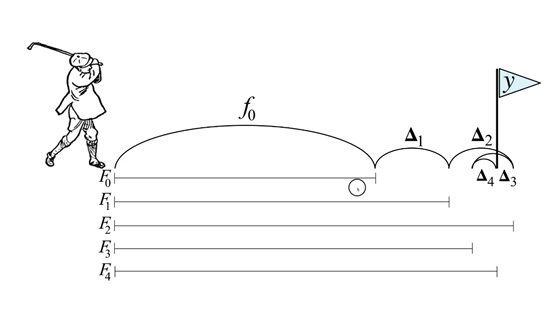

* Eklemeli modeli anladık ki bizim çalışmanın başında bir tahmin sonucumuz var, bu tahmin sonucuna bir şeyler ekleyerek ya da çıkarark optimum sonuçlara gitmeye çalışacağız. İşte bunun için yukarıdaki görselde çok güzelbir örnek vardır.

* Görselin fonksiyonlaştırılmış hali:

* 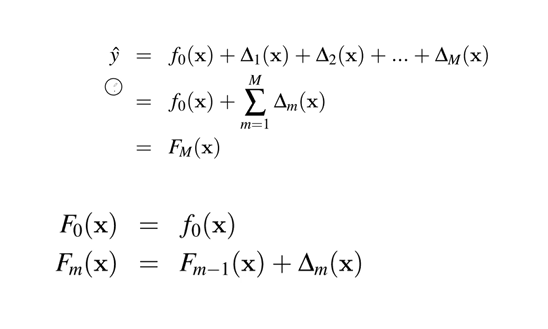

* y şapka artıklar (hatalar) serisi ile elde ediliyor. İlk modelimiz (f0(x)) klasik CART'tan gelen tahmin sonuçlarını düşünelim, Δ ise tahmin sonuçları ile gerçek sonuçlar arasındaki farkları ifade eden errorlardır. Bu error/artık/hataların üzerine kurulan modelin çıktısı yani bağımlı değişkenimiz buradaki her bir iterasyonda bir önceki iterasyonda elde edilen artıklar yeni bağımlı değişkenler olur. f0 modeli ilk başta kurulan base learnerdır. Ondan sonrakiler ise artık modellerdir. m iterasyon sayısıdır.

* 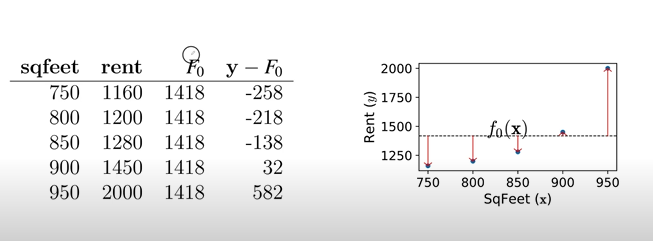

* Yukarıda rent olarak yazılan değer gerçek değerdir, gerçek değer ise y'dir. F0 ise karşımıza şapkalı y0 olarak çıkar. Metrekare ve fiyat bilgisi verilen grefikte f0(x)'in sabit olduğuna dikkat edelim. Bu sabit değer tablodan da anlaşılacağı üzere 1418'dir. Gerçek değerlerimizin bulunduğu noklatalar ile sabit fonksiyon arasındaki farklar ise grafikte kırmızı oklar ile ifade edilmiştir. Biz öyle bir şey yapmalıyız ki bu sabit fonksiyon additive (eklemeli) bir şekilde bazı eklemeler yapıp bu sabit halini biçimlendirebiliyor olmalıyız. Bu eklemeleri gradşent descent aracılığıyla artıklardan gelen tahmin değerleri ile eklemeler çıkarmalar yaparak gerçekleştiriyor olacağız.

* Aşağıdaki bir iki iterasyonu birlikte değerlendirmeye çalışalım. Metrekare bilgisi ve kira bilgisi vardır. F0 ise tahmin edilen değerlerdi. rent gerçek değerlerdi. Tahmin edilen değer ile gerçek değer arasındaki farkları aldık. y - F0 ile tabloda gösterilmiştir. Bunlara y1 diyelim. Bağımsız değişkenimiz sqfeet, hala bağımsız değişkenimiz olarak duruyor, onda bir değişiklik yok. y1'imiz yeni bağımlı değşkenlerimiz olsun. Bağımsız değişkenin değerlerini tek tek çağırdık diyelim. Çeşitli noktalarından bunu bölüp en düşük SSE'ye sebep olduğunu düşündüğümüz kesim noktasının 900 ile 950 arasında olduğunu düşünelim. Şu anda y1 bağımlı değişkenimiz ile sqfeet bağımsız değişkeni modele soktuk. Modelledikten sonra elde ettiğimiz tahmin sonuçları ise Δ1'lerdir. 

* 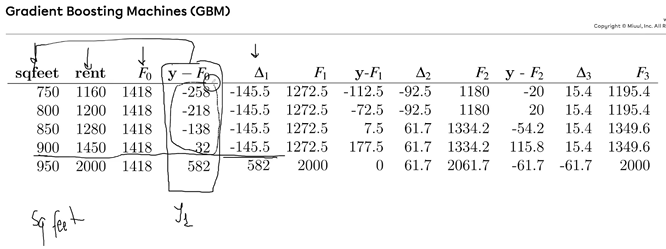

* 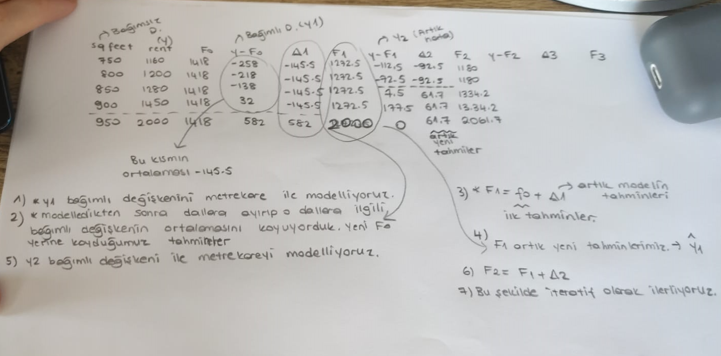

* Yukarıdaki şekilde ilk tahmin değeri olan 1418 yerine daha hassas daha gerçeğe yakın değerler gerçeğe yakın olarak değerlendirilmiş olacak.

* Gradient descent bölümünü hatırlayalım orada bir sabitimiz (b) vardı, bir de w değerimiz vardı. Sabitin türevi gerçek değerlerle tahmin edilen değerlerin farkıydı. BURASI ÇOK KİLİT BİR NOKTADIR. b = yi - şapkalı yi ike w = |yi - şapkalı yi|xi'ydi. Ama sabitin türevi neydi? Yani türeve uyduğumuzda ilgili değişikliğin hatayı en ciddi şekilde azaltacağı yöne gittiğimizi biliiyorduk ve sabit değerde anladık ki aslında gerçek değerle tahmin edilen değeri birbirinden çıkartıp belirli bir learning rate ile çarparak eski parametre değriyle işleme soktuğumuzda yani güncellediğimizde en gitmemiz gereken yöne gidiyorduk. Burada da bağımlı değişkenin değeri (rent / y) sabittir. 

* 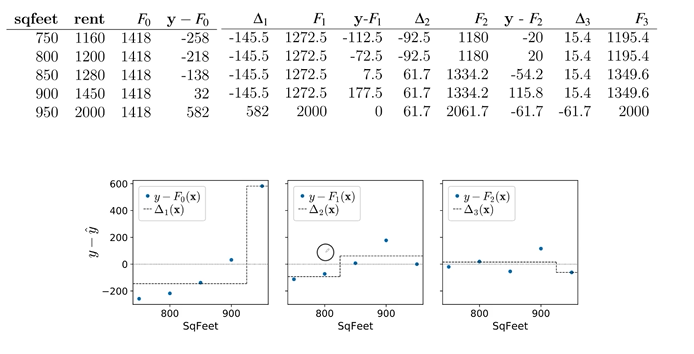

* Birinci artıklarımız ve bağımlı değişkenimiz y - şapkalı y yani y - F0'dır. Gittikçe gerçek değer ve tahmin edilen değer farkları minimize olmuştur. Bunu garfiklerden anlıyoruz. Hatalar optimize edilerek küçültülmüştür. Nasıl küçültülür başarı tahmin yaparak küçültülür. 

* 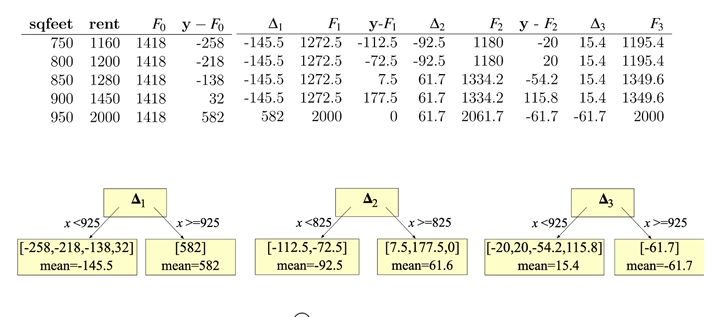

* DİKKAT : En soldaki görsel tahmin sonuçlarını gösteriyor. x bağımsız değişkeni 925'ten küçük olduğunda tabloda da yaptığımız gibi böldüğümüzde yukarıda kalan -258, -218, -138, 32 ve 582 değerlerinin ortalaması alınarak Δ1 kısmına değerler yazılmıştır. x bağımsız değişkeninin 925'e eşit veya 925'den büyük olduğu senaryoda da aynı işlemler yapılarak 582 değeri elde edilmiştir. İterasyonların her birinde modelleme yapıldıktan sonra elde edilen tahmin sonuçları da görselleştirilmiştir. Bu şekilde iterasyonlar devam ettiği müddetçe artıklar küçülmüş dolayısıyla tek bir tahminsel model formunda modeller serisi kurulmuş, her bir iterasyonda artıklar minimize edilerek ve eski tahmin sonuçlarının üzerine bir şeyler eklenerek yeni tahmin sonuçları elde edilmiştir.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [2]:
################################################
# GBM
################################################

# Modeli kuralım:
gbm_model = GradientBoostingClassifier(random_state=17)

# Ön tanımlı parametreleri gözlemleyelim:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 17,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

* 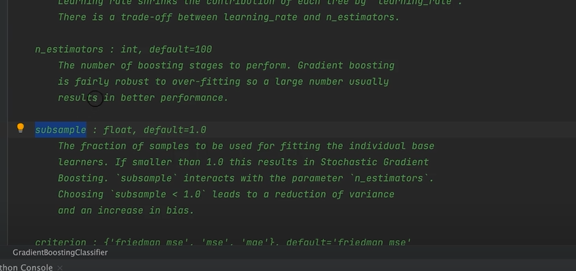

In [3]:
cv_results = cross_validate(gbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.7591715474068416

In [4]:
cv_results['test_f1'].mean()

0.634235802826363

In [5]:
cv_results['test_roc_auc'].mean()

0.8254867225716283

In [6]:
gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8, 10],
              "n_estimators": [100, 500, 1000],
              "subsample": [1, 0.5, 0.7]}

gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

gbm_best_grid.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}

In [7]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17, ).fit(X, y)


cv_results = cross_validate(gbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.7800186741363212

In [8]:
cv_results['test_f1'].mean()

0.668605747317776

In [9]:
cv_results['test_roc_auc'].mean()

0.8257784765897973